In [1]:
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install glob
# %pip install pathlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import glob
from pathlib import Path
from IPython.display import Markdown

In [3]:
# Define party colors
party_colors = {
    'Aam Aadmi Party': '#009ADA',
    'All India Trinamool Congress': '#24B44C',
    'All India Majlis-E-Ittehadul Muslimeen': '#20783B',
    'Bahujan Samaj Party': '#22409A',
    'Bharatiya Janata Party': '#FF9933',
    'Communist Party of India': '#DE0000',
    'Communist Party of India (Marxist)': '#FF0000',
    'Communist Party of India (Marxist-Leninist) (Liberation)': '#CC0000',
    'Hindustani Awam Morcha (Secular)': '#DC143C',
    'Indian National Congress': '#166A2F',
    'Jammu & Kashmir National Conference': '#C8102E',
    'Jammu & Kashmir People Conference': '#00539B',
    'Jammu & Kashmir Peoples Democratic Party': '#016138',
    'Jan Suraaj Party': '#FFD700',
    'Janata Dal (United)': '#228B22',
    'Jharkhand Mukti Morcha': '#004B1F',
    'Lok Janshakti Party (Ram Vilas)': '#FFA500',
    'Nationalist Congress Party': '#0640AD',
    'Nationalist Congress Party – Sharadchandra Pawar': '#8B4513',
    'Rashtriya Janata Dal': '#008000',
    'Rashtriya Lok Morcha': '#FFB300',
    'Samajwadi Party': '#FE0000',
    'Shiv Sena': '#FF6634',
    'Shiv Sena (Uddhav Balasaheb Thackeray)': '#FF8C00',
}

In [4]:
results_dataset = "./results/2025Assembly-BR.csv"
df = pd.read_csv(results_dataset)

election_state = df.loc[0, 'election_state']
query_string = f"state_code == '{election_state}'"
election_state = pd.read_csv("states.csv").query(query_string).state_name.values[0]

election_year = df.loc[0, 'election_year']

print('='*50)
print(f"{election_year} {election_state} {df.loc[0, 'election_type']} Election Results")
print('='*50)

df['total_votes'] = df['evm_votes'] + df['postal_votes']
df.drop(['election_year', 'election_type'], axis=1, inplace=True)

display(df)

2025 Bihar Assembly Election Results


,election_state,constituency,constituency_no,serial_no,candidate,party,evm_votes,postal_votes,total_votes
0,BR,VALMIKI NAGAR,1,1,DHIRENDRA PRATAP SINGH ALIAS RINKU SINGH,Janata Dal (United),105771,284,106055
1,BR,VALMIKI NAGAR,1,2,RAMESHWAR YADAV,Bahujan Samaj Party,5294,18,5312
2,BR,VALMIKI NAGAR,1,3,SURENDRA PRASAD,Indian National Congress,107374,356,107730
3,BR,VALMIKI NAGAR,1,4,RAJESH SHARMA,Lok Samaj Party,2301,2,2303
4,BR,VALMIKI NAGAR,1,5,AZHARUDDIN ANSARI,Independent,1553,1,1554
...,...,...,...,...,...,...,...,...,...
2854,BR,CHAKAI,243,7,CHANDAN KUMAR SINGH,Independent,12484,18,12502
2855,BR,CHAKAI,243,8,RANJIT KUMAR VERMA,Independent,2394,0,2394
2856,BR,CHAKAI,243,9,SANJAY PRASAD,Independent,48026,39,48065
2857,BR,CHAKAI,243,10,SOSANA MURMU,Independent,3980,0,3980


In [5]:
top_n = 10

# Get top 2 candidates from each constituency
top_2_candidates = df.sort_values('total_votes', ascending=False).groupby('constituency_no').head(2)

# Create separate dataframes for winners and runners-up
winners = top_2_candidates.groupby('constituency_no').first().reset_index()
runners_up = top_2_candidates.groupby('constituency_no').last().reset_index()

# Combine winner and runner-up information
results_df = pd.DataFrame({
    'Constituency': winners['constituency'],
    'Constituency No': winners['constituency_no'],
    'Candidate (Winner)': winners['candidate'],
    'Votes (Winner)': winners['total_votes'],
    'Party (Winner)': winners['party'],
    'Candidate (Runner-up)': runners_up['candidate'],
    'Votes (Runner-up)': runners_up['total_votes'],
    'Party (Runner-up)': runners_up['party'],
    'Margin': winners['total_votes'] - runners_up['total_votes']
})

print('='*80)
print(f"Top {top_n} Winning Candidates by Victory Margin")
print('='*80)

results_df = results_df.sort_values('Margin', ascending=False).reset_index(drop=True)
display(results_df.head(top_n))

Top 10 Winning Candidates by Victory Margin


,Constituency,Constituency No,Candidate (Winner),Votes (Winner),Party (Winner),Candidate (Runner-up),Votes (Runner-up),Party (Runner-up),Margin
0,RUPAULI,60,KALADHAR PRASAD MANDAL,124826,Janata Dal (United),BIMA BHARTI,51254,Rashtriya Janata Dal,73572
1,DIGHA,181,SANJIV CHAURASIA,111001,Bharatiya Janata Party,DIVYA GAUTAM,51922,Communist Party of India (Marxist-Leninist) (L...,59079
2,SUGAULI,11,RAJESH KUMAR ALIAS BABLU GUPTA,98875,Lok Janshakti Party (Ram Vilas),SHYAM KISHOR CHAUDHARY,40684,Janshakti Janta Dal,58191
3,GOPALPUR,153,SHAILESH KUMAR ALIAS BULO MANDAL,108630,Janata Dal (United),PREM SAGAR ALIAS DABLU YADAV,50495,Vikassheel Insaan Party,58135
4,AURAI,89,RAMA NISHAD,104085,Bharatiya Janata Party,BHOGENDRA SAHNI,46879,Vikassheel Insaan Party,57206
5,ALAMNAGAR,70,NARENDRA NARAYAN YADAV,138401,Janata Dal (United),NABIN KUMAR,82936,Vikassheel Insaan Party,55465
6,RAJGIR,173,KAUSHAL KISHORE,107811,Janata Dal (United),BISHWANATH CHAUDHARY,52383,Communist Party of India (Marxist-Leninist) (L...,55428
7,DHAMDAHA,61,LESHI SINGH,138750,Janata Dal (United),SANTOSH KUMAR,83591,Rashtriya Janata Dal,55159
8,JHANJHARPUR,38,NITISH MISHRA,107958,Bharatiya Janata Party,RAM NARAYAN YADAV,53109,Communist Party of India,54849
9,JAMUI,241,SHREYASI SINGH,123868,Bharatiya Janata Party,MOHAMMAD SHAMSAD ALAM,69370,Rashtriya Janata Dal,54498


In [6]:
print('='*80)
print(f"Bottom {top_n} Winning Candidates by Victory Margin")
print('='*80)

display(results_df.sort_values('Margin', ascending=True).head(top_n))

Bottom 10 Winning Candidates by Victory Margin


,Constituency,Constituency No,Candidate (Winner),Votes (Winner),Party (Winner),Candidate (Runner-up),Votes (Runner-up),Party (Runner-up),Margin
242,SANDESH,192,RADHA CHARAN SAH,80598,Janata Dal (United),DIPU SINGH,80571,Rashtriya Janata Dal,27
241,RAMGARH,203,SATISH KUMAR SINGH YADAV,72689,Bahujan Samaj Party,ASHOK KUMAR SINGH,72659,Bharatiya Janata Party,30
240,AGIAON,195,MAHESH PASWAN,69412,Bharatiya Janata Party,SHIV PRAKASH RANJAN,69317,Communist Party of India (Marxist-Leninist) (L...,95
239,NABINAGAR,221,CHETAN ANAND,80380,Janata Dal (United),AMOD KUMAR SINGH,80268,Rashtriya Janata Dal,112
238,DHAKA,21,FAISAL RAHMAN,112727,Rashtriya Janata Dal,PAWAN KUMAR JAISWAL,112549,Bharatiya Janata Party,178
237,FORBESGANJ,48,MANOJ BISHWAS,120114,Indian National Congress,VIDYA SAGAR KESHARI,119893,Bharatiya Janata Party,221
236,BALRAMPUR,65,SANGITA DEVI,80459,Lok Janshakti Party (Ram Vilas),MOHAMMAD ADIL HASAN,80070,All India Majlis-E-Ittehadul Muslimeen,389
235,CHANPATIA,7,ABHISHEK RANJAN,87538,Indian National Congress,UMAKANT SINGH,86936,Bharatiya Janata Party,602
234,JEHANABAD,216,RAHUL KUMAR,86402,Rashtriya Janata Dal,CHANDESHWAR PRASAD,85609,Janata Dal (United),793
233,BODH GAYA,229,KUMAR SARVJEET,100236,Rashtriya Janata Dal,SHYAMDEO PASWAN,99355,Lok Janshakti Party (Ram Vilas),881


In [7]:
# Calculate deposit loss status directly using transform
df['deposit_lost'] = df['total_votes'] < (df.groupby('constituency_no')['total_votes'].transform('sum') / 6)

# Find winners in each constituency
df['is_winner'] = df['total_votes'] == df.groupby('constituency_no')['total_votes'].transform('max')

print('='*50)
print(f"Candidates who had to forfeit their deposit")
print('='*50)

# Display some examples to verify
select_columns = ['constituency', 'constituency_no', 'candidate', 'serial_no', 'party', 'total_votes']
ffdeposit = df[df['deposit_lost'] == True]
ffdeposit = ffdeposit[select_columns]
display(ffdeposit)

Candidates who had to forfeit their deposit


,constituency,constituency_no,candidate,serial_no,party,total_votes
1,VALMIKI NAGAR,1,RAMESHWAR YADAV,2,Bahujan Samaj Party,5312
3,VALMIKI NAGAR,1,RAJESH SHARMA,4,Lok Samaj Party,2303
4,VALMIKI NAGAR,1,AZHARUDDIN ANSARI,5,Independent,1554
5,VALMIKI NAGAR,1,MAHMAD JALIL,6,Independent,2426
6,VALMIKI NAGAR,1,SURENDRA RAM,7,Independent,1852
...,...,...,...,...,...,...
2853,CHAKAI,243,ALIJAVETH SOREN,6,Independent,6828
2854,CHAKAI,243,CHANDAN KUMAR SINGH,7,Independent,12502
2855,CHAKAI,243,RANJIT KUMAR VERMA,8,Independent,2394
2857,CHAKAI,243,SOSANA MURMU,10,Independent,3980


In [11]:
# Calculate party-wise vote shares and other metrics
vote_shares = df.groupby('party').agg({
    'total_votes': 'sum',
    'deposit_lost': ['count', 'sum'],
    'is_winner': 'sum'
}).reset_index()

# Flatten multi-level columns
vote_shares.columns = ['Party', 'Votes Won', 'Total Candidates', 'Deposits Lost', 'Seats Won']

# Calculate percentages
total_votes = df['total_votes'].sum()
vote_shares['Vote Share %'] = (vote_shares['Votes Won'] / total_votes * 100).round(2)
vote_shares['Deposits Lost %'] = (vote_shares['Deposits Lost'] / vote_shares['Total Candidates'] * 100).round(2)
vote_shares = vote_shares.sort_values(['Seats Won', 'Votes Won'], ascending=False)
vote_shares.reset_index(drop=True, inplace=True)

# Set NOTA values to 0
vote_shares.loc[vote_shares['Party'] == 'None of the Above', ['Deposits Lost %', 'Deposits Lost', 'Seats Won', 'Total Candidates']] = 0
nota_position = vote_shares[vote_shares['Party'] == 'None of the Above'].index[0]
vote_shares = vote_shares[['Party', 'Total Candidates', 'Seats Won', 'Votes Won', 'Vote Share %', 'Deposits Lost', 'Deposits Lost %']]

# Sort by total votes and get display cutoff
print('=' * 50)
print(f"Party-wise Performance by Vote Share")
print('=' * 50)

display(vote_shares.head(nota_position+1).sort_values('Votes Won', ascending=False))

Party-wise Performance by Vote Share


,Party,Total Candidates,Seats Won,Votes Won,Vote Share %,Deposits Lost,Deposits Lost %
2,Rashtriya Janata Dal,143,25,11546055,23.00,1,0.70
0,Bharatiya Janata Party,101,89,10081143,20.08,0,0.00
1,Janata Dal (United),101,85,9667118,19.25,0,0.00
4,Indian National Congress,61,6,4374579,8.71,5,8.20
12,Independent,925,0,2516297,5.01,915,98.92
3,Lok Janshakti Party (Ram Vilas),28,19,2497358,4.97,0,0.00
13,Jan Suraaj Party,238,0,1677583,3.34,236,99.16
8,Communist Party of India (Marxist-Leninist) (L...,20,2,1425592,2.84,0,0.00
5,All India Majlis-E-Ittehadul Muslimeen,28,5,930504,1.85,19,67.86
14,None of the Above,0,0,910730,1.81,0,0.00


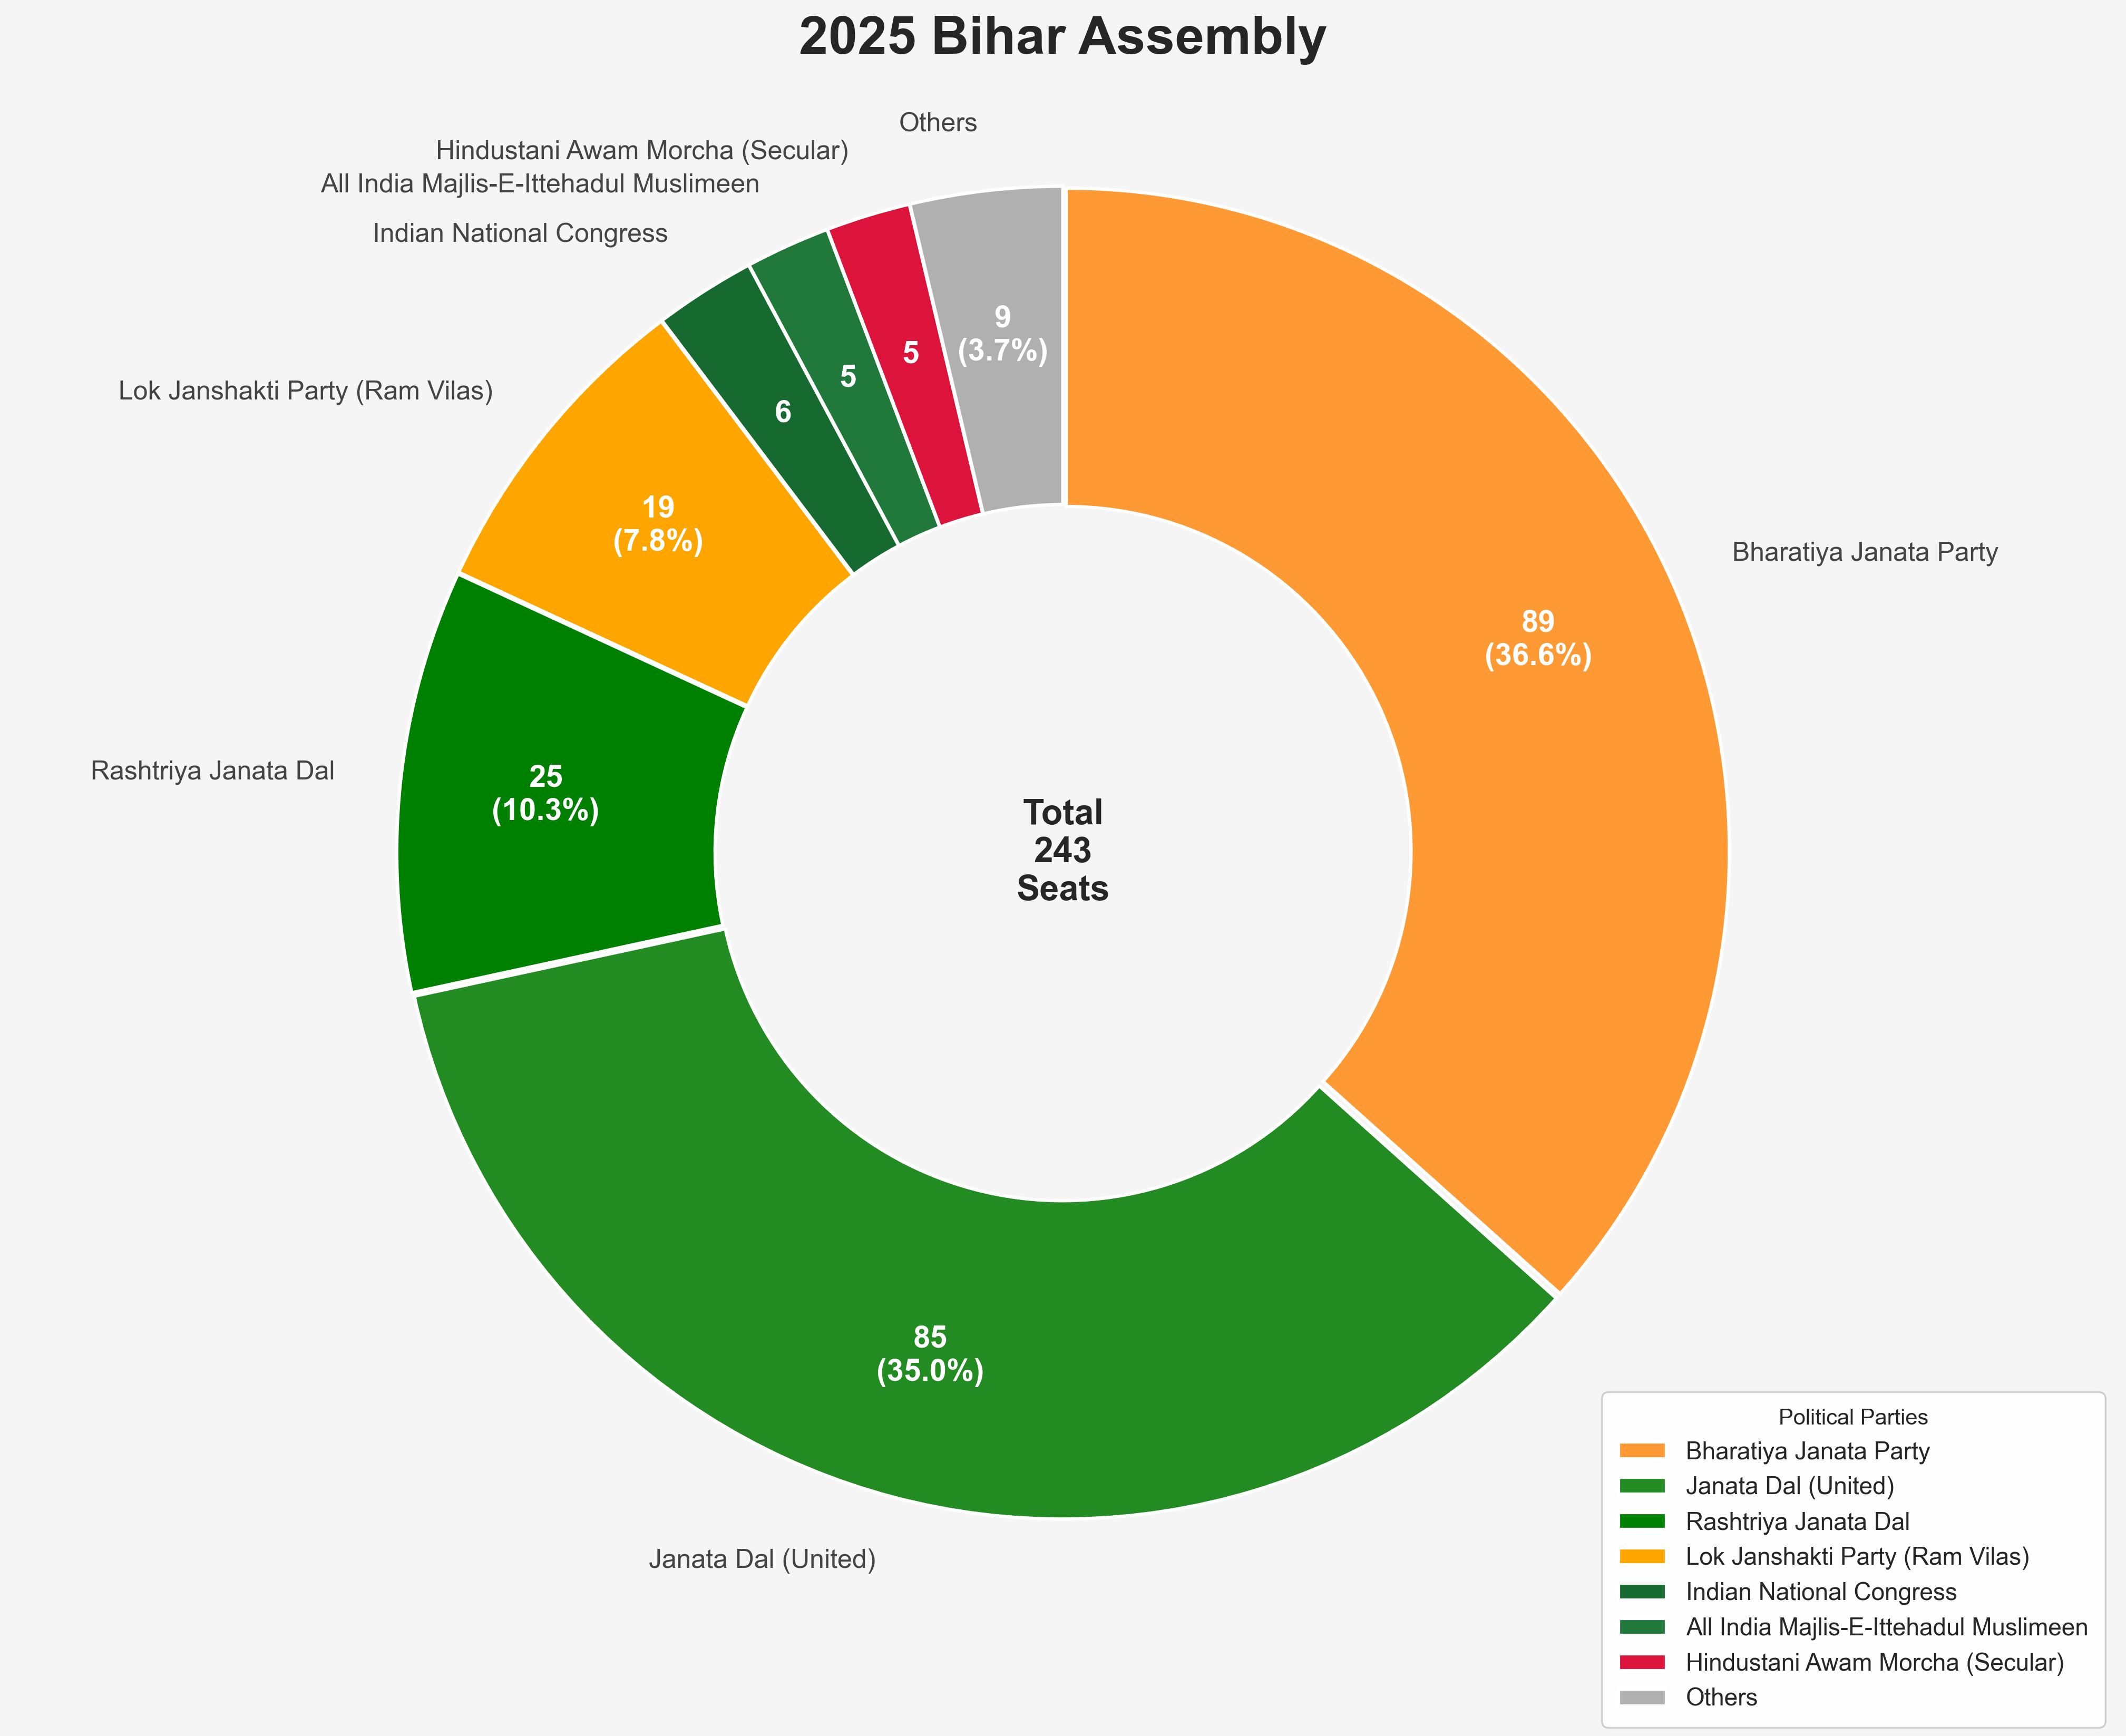

| Party                                                    |   Seats Won |   Seat Share % |
|:---------------------------------------------------------|------------:|---------------:|
| Bharatiya Janata Party                                   |          89 |          36.63 |
| Janata Dal (United)                                      |          85 |          34.98 |
| Rashtriya Janata Dal                                     |          25 |          10.29 |
| Lok Janshakti Party (Ram Vilas)                          |          19 |           7.82 |
| Indian National Congress                                 |           6 |           2.47 |
| All India Majlis-E-Ittehadul Muslimeen                   |           5 |           2.06 |
| Hindustani Awam Morcha (Secular)                         |           5 |           2.06 |
| Rashtriya Lok Morcha                                     |           4 |           1.65 |
| Communist Party of India (Marxist-Leninist) (Liberation) |           2 |           0.82 |
| Bahujan Samaj Party                                      |           1 |           0.41 |
| Communist Party of India (Marxist)                       |           1 |           0.41 |
| Indian Inclusive Party                                   |           1 |           0.41 |

In [9]:
# Build assembly composition and club small parties into "Others"
total_seats = len(results_df)
assembly_composition = vote_shares[vote_shares['Seats Won'] > 0].copy()
assembly_composition['Seat Share %'] = assembly_composition['Seats Won'] / total_seats * 100
small_mask = assembly_composition['Seat Share %'] <= 2.0
others_seats = assembly_composition.loc[small_mask, 'Seats Won'].sum()
assembly_summary = assembly_composition.loc[~small_mask].copy()
if others_seats > 0:
    assembly_summary = pd.concat(
        [
            assembly_summary,
            pd.DataFrame([
                {
                    'Party': 'Others',
                    'Seats Won': others_seats,
                    'Seat Share %': others_seats / total_seats * 100,
                }
            ]),
        ],
        ignore_index=True,
    )

colors = []
for party in assembly_summary['Party']:
    if party == 'Others':
        colors.append('#B0B0B0')
    else:
        colors.append(party_colors.get(party, '#808080'))

seats = assembly_summary['Seats Won'].tolist()

def make_autopct(seat_counts):
    def inner(pct):
        seat = seat_counts[inner.counter]
        inner.counter += 1
        autopct = f"{seat}"
        autopct += f"\n({pct:1.1f}%)" if pct > 3.0 else ''
        return autopct
    inner.counter = 0
    return inner

explode = [0.005] * len(seats)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14, 11), dpi=300)
patches, texts, autotexts = ax.pie(
    assembly_summary['Seats Won'],
    labels=assembly_summary['Party'],
    colors=colors,
    autopct=make_autopct(seats),
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.48, edgecolor='white', linewidth=1.5),
    pctdistance=0.78,
    explode=explode,
    textprops=dict(color='#111111', fontsize=13),
)

for text in texts:
    text.set_fontweight('light')
    text.set_fontsize(12)
    text.set_color('#444444')

for text in autotexts:
    text.set_fontsize(14)
    text.set_fontweight('bold')
    text.set_color('#FFFFFF')

ax.set_facecolor('#F5F5F5')
fig.patch.set_facecolor('#F5F5F5')
centre_circle = plt.Circle((0, 0), 0.33, color='#F5F5F5', zorder=0)
ax.add_artist(centre_circle)
plt.text(0, 0, f'Total\n{total_seats:,}\nSeats', ha='center', va='center', fontsize=16, fontweight='semibold')

legend = ax.legend(
    assembly_summary['Party'],
    title='Political Parties',
    loc='lower right',
    bbox_to_anchor=(1.0, -0.1),
    fontsize=11,
    frameon=True,
    facecolor='#FFFFFF',
    edgecolor='#CCCCCC',
)
legend.get_frame().set_boxstyle('round', pad=0.3)
legend.get_frame().set_alpha(0.95)
legend.get_frame().set_linewidth(0.8)

plt.title(f"{election_year} {election_state} Assembly", pad=30, fontsize=24, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Numerical breakdown table for all parties
breakdown = vote_shares[vote_shares['Seats Won'] > 0].copy()
breakdown['Seat Share %'] = (breakdown['Seats Won'] / total_seats * 100).round(2)
breakdown = breakdown.sort_values('Seats Won', ascending=False)
breakdown = breakdown.reset_index(drop=True)
md_table = breakdown[['Party', 'Seats Won', 'Seat Share %']]
display(Markdown(md_table.to_markdown(index=False)))

In [ ]:
sizes = assembly_summary['Seats Won'].tolist()
labels = assembly_summary['Party'].tolist()
treemap_colors = colors

fig, ax = plt.subplots(figsize=(12, 10), dpi=300)

squarify.plot(
    sizes=sizes,
    label=[f"{party}\n{seats} seats" for party, seats in zip(labels, sizes)],
    color=treemap_colors,
    alpha=0.9,
    text_kwargs={'fontsize': 11, 'weight': 'bold', 'color': '#FFFFFF'}
)

ax.set_title(f"{election_year} {election_state} Assembly", pad=20, fontsize=24, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Get all Assembly CSV files from results directory
results_dir = Path('./results')
csv_files = glob.glob(str(results_dir / '*Assembly*.csv'))

# Read and concatenate all CSV files
df_master = pd.concat([pd.read_csv(f) for f in sorted(csv_files)], ignore_index=True)
df_master['total_votes'] = df_master['evm_votes'] + df_master['postal_votes']

print('='*60)
print(f"Master DataFrame of Assembly Election Results on India Votes Data")
print('='*60)

display(df_master)